로지스틱 회귀(분류) 모델 구현

In [255]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier # 분류
from sklearn.neighbors import KNeighborsRegressor # 회귀(예측)
from sklearn.linear_model import LinearRegression # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split # 데이터 나누기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자 한글설정
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [256]:
df = pd.read_csv('https://bit.ly/fish_csv')
df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [257]:
df.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [258]:
df['Species'].unique() # 분류 형태 7가지

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [259]:
# 데이터에 문자가 존재하면
# 문자를 삭제 or 코드로 변경(아스키코드, 원-핫 인코딩) 판단해야함

In [278]:
# pandas - one-hot encoding function
df_dumn = pd.get_dummies(df['Species'])
df_dumn#.iloc[36]

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...
154,False,False,False,False,False,True,False
155,False,False,False,False,False,True,False
156,False,False,False,False,False,True,False
157,False,False,False,False,False,True,False


In [261]:
df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [262]:
# 데이터 전처리 : data,result -> train,test set 
# 데이터 전처리 : 표준화
# 데이터 학습
# 데이터 정답률

In [263]:
# data, result
d_target = df['Species'].to_numpy()
d_input = df.iloc[:,1:]

In [264]:
# train, test setting
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(
    d_input,d_target,random_state=42
)

In [265]:
# 표준화 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [266]:
# 데이터 학습
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled,train_target)

LogisticRegression()

In [267]:
# 정답률
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))      # 과소적합 

0.8067226890756303
0.85


In [268]:
# 반복횟수를 늘려 정답률을 높이기
lr = LogisticRegression(C = 20, max_iter=1000) # C - 규제의 정도를 정하는 로지스틱 회귀의 파라미터, max_iter - 반복 횟수
lr.fit(train_scaled,train_target)


LogisticRegression(C=20, max_iter=1000)

In [269]:
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.9327731092436975
0.925


In [270]:
# 경사하강법 - 머신러닝 튜닝 / 기존에 훈련된 모델을 다시 훈련시킴
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss',max_iter=10,random_state=42)
sc.fit(train_scaled,train_target)

c:\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [271]:
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.773109243697479
0.775


In [272]:
classes = np.unique((train_target))
classes 

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [273]:
# 데이터의 일부를 가져와서 훈련을 하여 target을 맞추는데, 일부만 가져와서 전체적인 target을 알지 못함
# 따라서 전체 target이 무엇인지 알려줘야 함.
sc.partial_fit(train_scaled,train_target,classes=classes)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8151260504201681
0.8


In [274]:
# partial_fit 을 반복시키면 효율이 좋아진다.
train_score = []
test_score = []

for _ in range(0,300):
    sc.partial_fit(train_scaled,train_target,classes=classes)
    train_score.append(sc.score(train_scaled,train_target))
    test_score.append(sc.score(test_scaled,test_target))

In [275]:
train_score

[0.7478991596638656,
 0.8319327731092437,
 0.8907563025210085,
 0.8487394957983193,
 0.8739495798319328,
 0.8487394957983193,
 0.8487394957983193,
 0.8487394957983193,
 0.8487394957983193,
 0.8487394957983193,
 0.8487394957983193,
 0.8739495798319328,
 0.8739495798319328,
 0.8823529411764706,
 0.8823529411764706,
 0.8907563025210085,
 0.8823529411764706,
 0.8991596638655462,
 0.8823529411764706,
 0.8991596638655462,
 0.8823529411764706,
 0.8991596638655462,
 0.8823529411764706,
 0.8991596638655462,
 0.907563025210084,
 0.9243697478991597,
 0.9159663865546218,
 0.9159663865546218,
 0.9159663865546218,
 0.9243697478991597,
 0.9159663865546218,
 0.9327731092436975,
 0.9243697478991597,
 0.9327731092436975,
 0.9327731092436975,
 0.9327731092436975,
 0.9327731092436975,
 0.9243697478991597,
 0.9327731092436975,
 0.9327731092436975,
 0.9327731092436975,
 0.9327731092436975,
 0.9327731092436975,
 0.9327731092436975,
 0.9327731092436975,
 0.9327731092436975,
 0.9327731092436975,
 0.93277310924

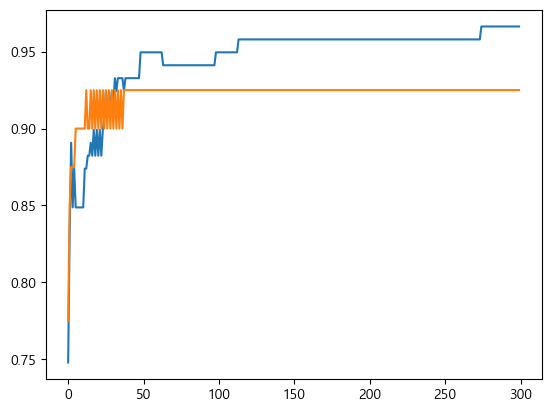

In [276]:
plt.plot(train_score)
plt.plot(test_score)

In [277]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None,random_state=42)
sc.fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.957983193277311
0.925
